# Probability #

In this notebook we will learn:

- The definition of probability
- The difference between a theoretical probability and an empirical probability
- About the binomial distribution
- About the Poisson distribution
- About conditional probability and independence
- About Bayes' Rule
- About the normal distribution
- How to do probability calculations with the normal distribution


#### Warning & Reminder to both Students and Instructors ####

This is not a probability course, it is a statistics course.  Statistics uses probability, like a carpenter uses a hammer.  A carpenter doesn't need to know how to make his own hammer, he just has to know how it works.  Likewise, we have many tools at our disposal that will calculate the probabilities we need as statisticians; there is little need to make these probability calculations from scratch in practice.  In this notebook, we will spend some time learning to make probability calculations from scratch, like learning to forge our own hammers, but in the future we will simply use the "hammers" that Python provides.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib
plots.style.use('fivethirtyeight')
import scipy.stats as stats

from hide_code3 import hide_code
hide_code()

ModuleNotFoundError: No module named 'hide_code3'

## Probability ##

Let an *experiment* refer to a situation where you observe and record the outcome without knowing in advance what it will be.  This could be as simple as flipping a coin and recording heads or tails.  It might refer to drawing cards from a shuffled deck.  It might mean counting people or objects with special properties; like, counting the people in a room wearing glasses, or counting the red cars in a parking lot.  

If $E$ is an event that can occur when an experiment is conducted.  

The probability of $E$, denoted $Pr(\,E\,)$, is a numerical measurement of how likely $E$ is to occur.  

Facts about probability

1. $0 \leq Pr(\,E\,) \leq 1$
2. The closer $Pr(\ E\ )$ is to 1, the more likely $E$ is to occur. If $Pr(\,E\,) = 1$, then $E$ is virtually guaranteed.
3. The closer $Pr(\,E\,)$ is to 0, the less likely $E$ is to occur. If $Pr(\,E\,) = 0$, then $E$ is virtually impossible.
4. If $E$ is an event, then "not E", denoted $\sim E$, is literally anything else that can happen that is not part of $E$, and $Pr(\sim E) = 1- Pr(\,E\,)$.

**Example 1**

Suppose an unfair coin is weighted so that $Pr(Heads) = \frac{2}{3}$.  Then what is $Pr(Tails)$?

**Example 2**

Suppose a fair six sided die is rolled, what's the probablity of it showing either 3 or 5?



### Theoretical Probability vs Empirical Probability ###

A theoretical probability is one that is based on assumptions and calculated mathematically.  The two examples above are both theoretical probabilities.  

An empirical probability is based on observed outcomes.  If I have an unfair coin that lands heads up more often than half the time, but I'm not sure exactly how often, I could flip that coin 100 times and count how often it lands heads up.  

If it lands heads up 60 times out of 100, then I'd estimate that $Pr(Heads) \approx \frac{60}{100} = 0.6$.


## Distributions ##

In [31]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [32]:
die.sample(10)

Face
3
6
2
5
4
4
4
6
3
5


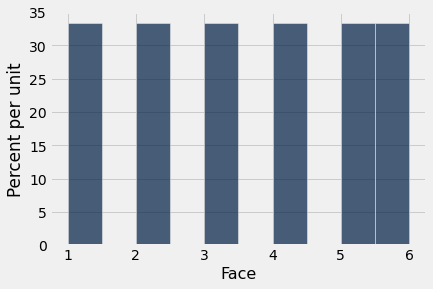

In [33]:
die.hist()

In [34]:
roll_bins = np.arange(0.5, 6.6, 1)

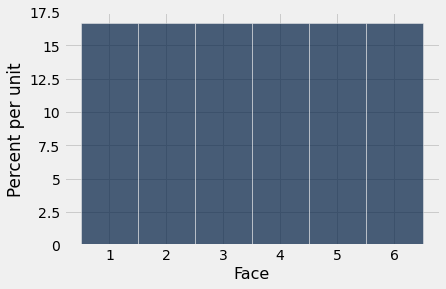

In [35]:
die.hist(bins=roll_bins)

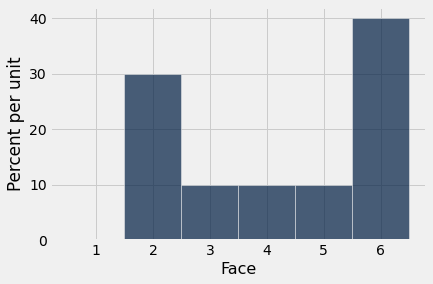

In [36]:
die.sample(10).hist(bins=roll_bins)

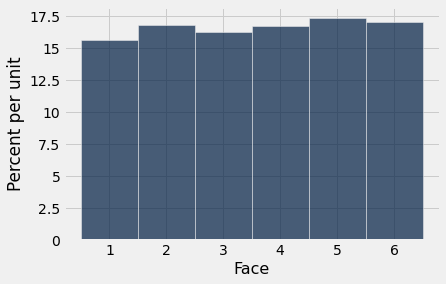

In [37]:
die.sample(5000).hist(bins=roll_bins)

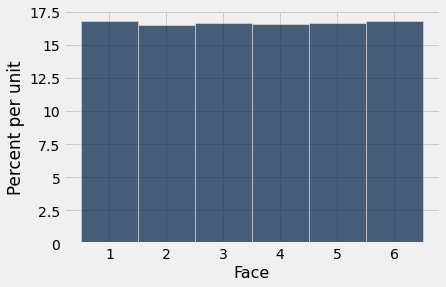

In [38]:
die.sample(100000).hist(bins=roll_bins)

### Consider a situation where we flip 10 fair coins and count the heads ###

This is actually a named probability distribution, as such, there are functions in the **scipy.stats** module that deal with it.  It's called the Binomial Distribution.  The 10 flips are our *trials* and since the coin is assumed fair the probability of heads is $\frac{1}{2}$.  

1. What's the probability that we get exactly 5 heads?

2. What's the probability we get up to 5 heads?

3. What's the probability we get *at least* 1 head?

4. Make a graph showing the probability distribution.

`scipy.stats.binom.pmf` is a function that does this for us.


In [39]:
# 1. What's the probability that we get exactly 5 heads?

stats.binom.pmf(5, 10, 0.5)

0.24609375000000025

$$\left( \begin{array}{c} n \\ k \end{array}\right) = \frac{n!}{k!(n-k)!}$$


$$Pr(X = k) = \left( \begin{array}{c} n \\ k \end{array}\right) p^k (1-p)^{n-k}$$


$$Pr(X = 5) = \left( \begin{array}{c} 10 \\ 5 \end{array}\right) 0.5^5 (1-0.5)^{10-5}$$

In [40]:
# 2. What's the probability we get up to 5 heads?

sum(stats.binom.pmf(np.arange(6), 10, 0.5))

0.6230468750000006

Or...

$$Pr(X \leq 5) = \sum_{k=0}^5 \left( \begin{array}{c} 10 \\ k \end{array}\right) 0.5^k (1-0.5)^{10-k}$$

In [41]:
#3. What's the probability we get *at least* 1 head?

sum(stats.binom.pmf(np.arange(1, 11,1), 10, 0.5))


0.9990234375000009

In [42]:
# 3. What's the probability we get *at least* 1 head?

1-stats.binom.pmf(0, 10, 0.5)

0.9990234375

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:3006: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


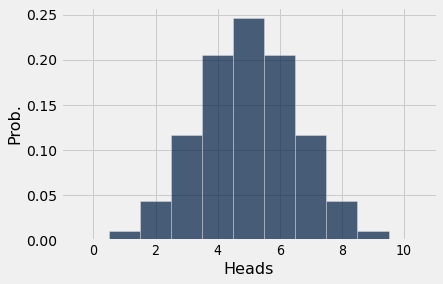

In [43]:
# 4. Graph of distribution

heads = np.arange(11)

pmf = stats.binom.pmf(heads, 10, 0.5)

Table().with_columns("Heads", heads, "Prob.", pmf).bar("Heads")

In [44]:
stats.binom.pmf(10, 10, 0.5)

0.0009765625

### Suppose we roll a fair 6 sided die 20 times and count the number of 5's ###

This is again the binomial distribution, this time with the number of trials being 20 and the probability of success being $\frac{1}{6}$.  

1. What's the probability of exactly 12 5's?

2. What's the probability of 12 or more 5's?

3. What's the probability of 2 5's?

4. What's the probability of 2 or more 5's?

5. Make a graph of the pmf.


In [45]:
stats.binom.pmf(12, 20, 1/6)

1.3458670365814973e-05

In [46]:
sum(stats.binom.pmf(np.arange(12, 21, 1), 20, 1/6))

1.5294887418783927e-05

In [47]:
stats.binom.pmf(2, 20, 1/6)

0.19823880511487493

In [48]:
sum(stats.binom.pmf(np.arange(2, 21, 1), 20, 1/6))

0.869579733477054

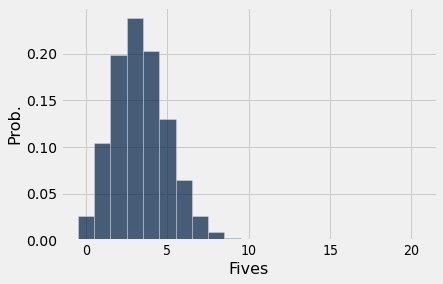

In [49]:
fives = np.arange(21)

pmf = stats.binom.pmf(fives, 20, 1/6)

Table().with_columns("Fives", fives, "Prob.", pmf).bar("Fives")

## Famous Example: The Lady Tasting Tea ##

A lady and scientist named Muriel Bristol claimed to be able to tell the difference between two types of cups of tea:

- tea first then cold milk poured on top
- milk first then hot tea poured on top

Fellow scholars, R. A. Fisher and William Roach, did not believe her, so they devised an experiment to test her.  Eight cups of tea were prepare, four of each type, and she had to sip them and identify which order the two ingredients were added to the cup.  

History records that she correctly identified all 8 cups.  


If she were randomly guessing, what is the probability of this outcome?

A null model that she's guessing, means $p = 0.5$.

If she's not guessing, then $p >> 0.5$, possibly $p \approx 1$.

In [50]:
stats.binom.pmf(8, 8, 0.5)

0.003906250000000001

**Example** An inexperienced gambler is playing a dice game at a casino, but does not understand the rules.  The croupier (casino employee who oversees the game) has offered to explain the rules, as have other players, but the new gambler is too embarrassed to admit the bad situation he's put himself in.  Any way, after each time the player throws the dice the croupier simply announced whether he's won or lost.  After 15 tosses, the player has only won 4 times.  

    a) What is the logical estimate for the probability of winning this game, based solely on the
    15 plays including 4 wins?
    
    b) What is the estimate for the probability of winning this game that makes the events observed most likely?
    
For the first one, we really have only the empirical probability to go by.  Therefore, for a) the answer must be $\displaystyle \frac{4}{15} = 0.2\overline{6} \approx 0.267$

For the second one, let's assume that Winning vs Losing is a binomial situation and use the binomial distribution.  Assume we don't know $p$, which is easy, because we don't.  Then write the pmf for the binomial distribution with $p$ left as a variable, but plug in the 15 and 4 we observed.  

$Pr(X = 4) = \left(\begin{array}{c} 15 \\ 4 \end{array}\right)\cdot p^4\cdot(1-p)^{11} = 1365\cdot p^4\cdot (1-p)^{11}$

Let's plot this as a function of $p$ and see where it peaks.  That will be the value of $p$ that makes 4 wins in 15 tries the most likely.  That's the $p$ we want.  

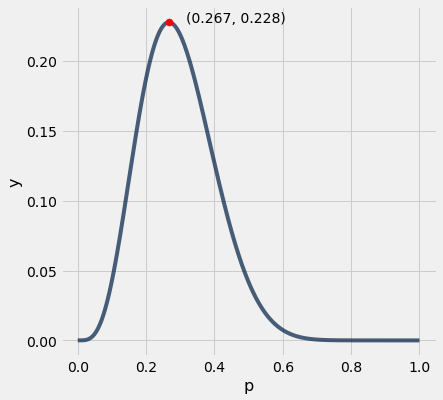

In [101]:
p = np.arange(0, 1.001, 0.001)

def pmf(p):
    return 1365*p**4*(1-p)**(11)

y = pmf(p)

max_table = Table().with_columns("p", p, "y", y)

max_p = max_table.where("y", max(y)).column("p").item(0)
max_y = np.round(max(y), 3)
max_table.plot("p", "y")
plots.scatter(max_table.where("y", max(y)).column("p")  ,max(y), color="red", zorder=50, s=50 );
plots.text(max_p+.05, max_y, f"({max_p}, {max_y})");


So the answer is about $0.267$ again.  Is that just a coincidence?  No, in this situation, that's how it always works out.  If you observe $k$ success in $n$ trials, both the so-called maximum likelyhood estimate and the method of moments estimate are $\displaystyle \frac{k}{n}$.  

## Mean and variance of Binomial Distribution

The mean of a of discrete distribution (like binomial distribution) is $\displaystyle \mu = \sum_{all\ x} x \cdot f(x)$ where $f(x)$ is the probability mass function. 

And the variance of a discrete distribution is $\displaystyle \sigma^2 = \sum_{all\ x} x^2 \cdot f(x) - \left[\sum_{all\ x} x \cdot f(x) \right]^2$

So if $X \sim Bin(n, p)$ then the mean of $X$ is $np$.

**Proof:**

$\displaystyle \mu = \sum_{k = 0}^n k \left( \begin{array}{c} n \\ k \end{array} \right) p^k (1-p)^{n-k}$

$\displaystyle \mu = \sum_{k = 0}^n k \frac{n!}{(n-k)!k!} p^k (1-p)^{n-k}$

$\displaystyle \mu = np\sum_{k = 0}^{n-1}  \frac{(n-1)!}{(n-k)!(k-1)!} p^{k-1} (1-p)^{n-k}$

$\displaystyle \mu = np \sum_{k=0}^{n-1} g(k)$, where $g(k)$ is the pmf for $Bin(n-1, p)$

$\displaystyle \mu = np$

$\square$

If $X \sim Bin(n, p)$ then the variance of $X$ is $np(1-p)$.  

We'll omit the proof of this fact, but suffice it to state that if we treat $x^2$ as $x(x-1) + x$ then we can simply play the same trick again.  

## Conditional Probability

The if $A$ and $B$ are both events, then the probability that $A$ happens given that $B$ either has happened or will happen is $Pr(A|B)$.  

**Example** Recall that there are 52 cards in a deck, divided into four suits of 13 cards each.  Within each suit the cards are labelled with the numbers from 2 to 10 then with a Jack, Queen, King or Ace.  If you're dealt two cards from a well-shuffled deck, what is the probability that the second card is a 10 given that the first card is a 10?

Since there are only 51 cards remaining after the first card is dealt, and only 3 of those are still 10's if the first one was a 10, the answer is:

$$\frac{3}{51} = \frac{1}{17}$$

**Example** An actuary working for an insurance company is looking at data for a particulary risky client.  He has also recently checked the weather report for the day, from which he learned that there is a 40% chance of rain. Looking back at the client information, the actuary estimates that there is a 20% chance of it both raining today and the client having a car accident today.  Once it has started raining (meaning, given that it is raining), what is the probability the client has an accident?

To work this problem, let's learn a formula for $Pr(A|B)$.

$$ Pr(A|B) = \frac{Pr(A \cap B)}{Pr(B)}$$

So $\displaystyle Pr(Accident|Rain) =\frac{Pr(Accident\ and\ Rain)}{Pr(Rain)} = \frac{0.20}{0.40} = 0.5$

**Example** There are three bags of coins.  One is entirely full of counterfeit coins (lead covered in gold leafing, essentially worthless).  Another bag is entirely full of real gold coins.  The third bag contains an even mixture of real gold coins and the counterfeit lead coins.  From the outside, the bags are indistinguishable, and you don't know which is which.  Also, you've never held a real gold coin before, so you don't know what one feels like.  

You're allowed to pick one bag and choose one coin to keep.  But you can't look in the bag, you just get to stick your hand in.    

    a) Given that you picked the bag containing the mixture, what's the probability of picking a real gold coin?

    b) What's the probability that you draw from the bag of all gold coins?

    c) What's the probability of picking a real gold coin?

    d) Given that you did successfully pick a real gold coin, what's the probability that you chose the bag of all gold coins? 

First, let's draw a probability tree to help us.  

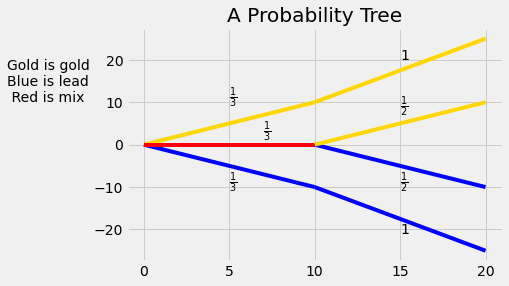

In [27]:
plots.plot([0, 10], [0, 10], color = "gold")
plots.plot([10, 20], [10, 25], color = "gold")
plots.plot([0,10], [0, -10], color = "blue")
plots.plot([10, 20], [-10, -25], color = "blue")
plots.plot([0, 10], [0,0], color = "red")
plots.plot([10, 20], [0, -10], color = "blue")
plots.plot([10, 20], [0,  10], color = "gold")
plots.text(5, 10, r'$ \frac{1}{3}$')
plots.text(7, 2, r'$ \frac{1}{3}$')
plots.text(5, -10, r'$ \frac{1}{3}$')
plots.text(15, 20, r'$ 1$')
plots.text(15, 8, r'$ \frac{1}{2}$')
plots.text(15, -10, r'$ \frac{1}{2}$')
plots.text(15, -21, r'$ 1$')
plots.title("A Probability Tree")
plots.text(-8, 10, "Gold is gold \nBlue is lead\n Red is mix");

    a) Given that you picked the bag containing the mixture, what's the probability of picking a 
    real gold coin?

*Answer:* $\displaystyle \frac{1}{2}$

    b) What's the probability that you draw from the bag of all gold coins?

*Answer:* $\displaystyle \frac{1}{3}$



    c) What's the probability of picking a real gold coin?  

*Answer:* $\displaystyle \frac{1}{3} \cdot 1 + \frac{1}{3}\cdot \frac{1}{2} = \frac{3}{6} = \frac{1}{2}$



    d) Given that you did successfully pick a real gold coin, what's the probability that you chose the bag of all gold coins.  

*Answer:* $\displaystyle Pr(All\ Gold\ Bag|Gold\ Coin) = \frac{Pr(Gold\ Bag\ and\ Gold\ Coin)}{Pr(Gold\ Coin)} = \frac{\frac{1}{3}  }{ \frac{1}{2} }  = \frac{2}{3}$


A useful thing to know is the following rearrangement of the definition of conditional probability.

$Pr(A \cap B) = Pr(A) \cdot Pr(B|A) = Pr(B) \cdot Pr(A|B)$

We'll be using this fact in the soon.  

## Independence

Two events $A$ and $B$ are independent if $Pr(A|B) = Pr(A)$ and $Pr(B) = Pr(B|A)$.  

This means that the likelyhood of $A$ happening is neither raised nor lowered by event $B$.  

It is not necessary to show both conditions to be true in order to show two events are independent.  One is sufficient.

**Proof:** Assume $A$ is independent from $B$, so $Pr(A) = Pr(A|B)$.  By definition, $\displaystyle Pr(A|B) = \frac{Pr(A \cap B)}{Pr(B)}$.

So we have:

$$Pr(A) = \frac{Pr(A \cap B)}{Pr(B)}$$

$$Pr(A) \cdot Pr(B) = Pr(A \cap B)$$

$$Pr(B) = \frac{Pr(A \cap B)}{Pr(A)} = Pr(B|A)$$

$\square$

Also from the middle equation above we learn this useful fact, that if $A$ and $B$ are independent then:

$$Pr(A \cap B)  = Pr(A) \cdot Pr(B) $$


## Law of Total Probability

If $A_1$, $A_2$, ..., $A_n$ are disjoint but exhaustive events and $B$ is a different event, then 

$$Pr(B) = Pr(A_1 \cap B) + Pr(A_2 \cap B) + \cdots + Pr(A_n \cap B)$$

**Example**  In a deck of cards there are 4 Aces and a total of 52 cards, so the probability of drawing an Ace is $\displaystyle \frac{4}{42} = \frac{1}{3}$. 

However, let's work this using the Law of Total Probability.  We don't need to, but this is a good first example because we'll be able to confirm we got the right answer.

Let $A_1$ be that the card is a Diamond, $A_2$ is a Heart, $A_3$ is a Spade and $A_4$ is a club.  

This is easy since the suits each comprise $\frac{1}{4}$ of the deck.  Then within each suit, there are 13 cards, only 1 of which is the Ace.  

$$\displaystyle \left( \frac{1}{4} \cdot \frac{1}{13}\right) + \left(\frac{1}{4} \cdot \frac{1}{13}\right) +\left(\frac{1}{4} \cdot \frac{1}{13}\right) +\left(\frac{1}{4} \cdot \frac{1}{13}\right)  = 4 \cdot \left(\frac{1}{4} \cdot \frac{1}{13}\right)  =  \frac{1}{13} $$


**Example**  A particular inexperienced driver has a 10% chance of having an accident if it is raining, but only a 1% chance of having an accident if it is not.  Suppose the weather report states that *today* there is a 40% chance of rain.  Then what is the probability this bad driver has an accident today?

Let $A_1$ be that it is raining, and $A_2$ be that it is not.  Then $B$ is that the driver has an accident.  

$\displaystyle Pr(B) = Pr(A_1 \cap B) + Pr(A_2 \cap B) = Pr(A_1)\cdot Pr(B|A_1) + Pr(A_1)\cdot Pr(B|A_1)$

$\displaystyle Pr(B) = 0.40\cdot 0.10 + 0.60\cdot 0.01 = 0.046$


**Example** A gardener has 100 plants.  Of those plants, 40 of them are of species that has a 20% chance of flowering in the next week, 35 of them are a type that has a 60% of flowering in the next week, and 25 of them have a 80% of flowering in the next week.  If you pick a plant at random and plant it, what's the probability that it flowers in the next week?


*Solution*  $$ \frac{40}{100} \cdot 0.20 + \frac{35}{100} \cdot 0.60 + \frac{25}{100} \cdot 0.80 = 0.49$$ 

## Bayes' Theorem 

Bayes' Theorem is a reworking of conditional probability. 

That if $A$ is a "first stage" event and $B$ is a "second stage" event, then we can calculate the probability of $A$ having happened knowing that $B$ did happen using Bayes' Theorem, which is really just the conditional probability formula.

$$Pr(A|B) = \frac{Pr(A \cap B)}{Pr(B)}$$

Sometimes, Bayes' Theorem is presented as a combination of the definition of conditional probability and the Law of Total Probability

If $A_i$ for $i = 1, \cdots, n$ are disjoint and exhaustive events, then

$$Pr(A_j|B) = \frac{Pr(A_j \cap B)}{\sum_{i = 1}^n Pr(A_i \cap B)}$$

**Example** There are four urns.  One of them is entirely full of red marbles, and another is entirely full of blue marbles.  A third urn contains a 40% red, 60% blue mixture of marbles and the final urn is exactly half of each.  You'll pick an urn at random then pick a marble from that urn at random.  

    a) What's the probability of picking the urn that is full of red marbles?

*Answer* $\displaystyle \frac{1}{4}$

    b) What's the probability of picking a red marble?
    
*Answer* $\displaystyle \frac{1}{4} \cdot 1 + \frac{1}{4} \cdot 0 + \frac{1}{4} \cdot 0.4 + \frac{1}{4} \cdot 0.5 = 0.475 $

    c) Given that you did pick a red marble, what is the probability that you choose the urn entirely full of reds?
    
*Answer* $\displaystyle\frac{\frac{1}{4}\cdot 1 }{\frac{1}{4} \cdot 1 + \frac{1}{4} \cdot 0 + \frac{1}{4} \cdot 0.4 + \frac{1}{4} \cdot 0.5} = \frac{1}{1.9} \approx 0.526  $

    d) Given that you picked a blue marble, what is the probability that you choose the urn entirely full of reds?
    
*Answer* The answer is an obvious 0, but how do we get that from the formula?
Like this:

$\displaystyle\frac{\frac{1}{4}\cdot 0 }{\frac{1}{4} \cdot 1 + \frac{1}{4} \cdot 0 + \frac{1}{4} \cdot 0.4 + \frac{1}{4} \cdot 0.5} = \frac{0}{0.475} = 0  $

These last two parts used Bayes' Theorem.  


## Poisson Distributions

**Example** Suppose the number of calls that a busy call center receives in an hour has a mean of 20.
        
    a) What's the probability the center receives 25 calls in the next hour?
    
    b) What's the probability the center receives *more* than 25 calls in the next hour?

This is an example of a problem that uses the Poisson distribution.  

If $X$ is Poisson distributed with mean $\lambda$ then the probability mass function is:

$$Pr(X = k) = f(k) = e^{-\lambda} \frac{\lambda^k}{k!}$$

So the answer to a) is $\displaystyle e^{-20} \frac{20^{25}}{25!}$


In [35]:
import math
math.e**(-20)*20**25/math.factorial(25)

0.04458764910826793

There is a function in `scipy.stats` that will make this computation for us.  

In [36]:
stats.poisson.pmf(25, 20)

0.04458764910826764

    b) What's the probability the center receives *more* than 25 calls in the next hour?

*Answer:*  $\displaystyle \sum_{k = 26}^{\infty} e^{-20} \frac{20^k}{k!} = 1- \sum_{k = 0}^{25} e^{-20} \frac{20^k}{k!}$
    

In [38]:
1-sum(stats.poisson.pmf(np.arange(26), 20))

0.11218497271797323

**Example** A type of cookie is made is such a way that the average number of chocolate chips per cookie is 8.  

    a) What's the probability a cookie has 10 or more chips?
    
    b) What's the probability a cookie has no chocolate chips?
    
    c) What's the probability a cookie has at least one chocolate chip?
    
Again, this situation calls for the use of the Poisson distribution.  

$$Pr(X = k) = e^{-8} \frac{8^k}{k!}$$

Therefore:

    a) What's the probability a cookie has 10 or more chips?

*Answer* $\displaystyle 1- \sum_{k=0}^9 e^{-8}\frac{8^k}{k!}$

    b) What's the probability a cookie has no chocolate chips?

*Answer* $\displaystyle e^{-8}\frac{8^0}{0!} = e^{-8}$

    c) What's the probability a cookie has at least one chocolate chip?

*Answer* $\displaystyle 1 - e^{-8}\frac{8^0}{0!} = e^{-8}$

In [39]:
## The work for a

1-sum(stats.poisson.pmf(np.arange(10),8))

0.28337574127299026

In [40]:
## The work for b

math.e**(-8)

0.00033546262790251196

In [41]:
## The work for c

1-math.e**(-8)

0.9996645373720975

**Example** When making a batch of chocolate chip cookies, we add exactly 108 chips to the dough.  The dough is thoroughly mixed and divided to make a dozen cookies.  

    a) After the cookies are baked, you pick one at random.  What's the probability that cookie has exactly 12 chips?
    
    b) What's the probability that cookie has 12 or more chips?

    c) What's the probability that cookie has fewer than 9 cookies.



This is still a Poisson distribution.  This time $\displaystyle \lambda = \frac{108}{12} = 9$.  

    a) What's the probability that cookie has exactly 12 chips?
    

*Answer*  $\displaystyle P(k = 12) = e^{-9} \frac{9^{12}}{12!}$

    b) What's the probability that cookie has 12 or more chips?

*Answer*  $\displaystyle P(k \geq 12) = \sum_{k=12}^{\infty} e^{-9} \frac{9^{k}}{k!} = 1-\sum_{k=0}^{11} e^{-9} \frac{9^{k}}{k!}$

    c) What's the probability that cookie has fewer than 9 cookies.
    
*Answer*  $\displaystyle P(k < 6) = Pr(k \leq 5) = \sum_{k=0}^{5} e^{-9} \frac{9^{k}}{k!}$    


In [42]:
## work for a

stats.poisson.pmf(12, 9)

0.0727650466416229

In [44]:
## work for b

1 - sum(stats.poisson.pmf(np.arange(12),9))

0.1969916174706572

In [45]:
## work for c

sum(stats.poisson.pmf(np.arange(9),9))

0.11569052084105788

**Example** You got a job as the new supervisor for a corporate call center.  On your first day, you will be sent to one of three call centers (randomly).  The first call center is not very busy and receives an average of 5 calls per hour.  The second call center is a little busier and receives an average of 10 calls per hour.  Lastly, the third call center receives 15 calls per hour on average. You won't have any way of knowing which center you've been sent to work in.  

    a) What's the probability that the call center receives exactly 15 calls during your first 
    hour?
    
    b) Given that the center does receive 15 calls during the first hour, what is the probability 
    your  assignment was to the busiest call center?
    
    

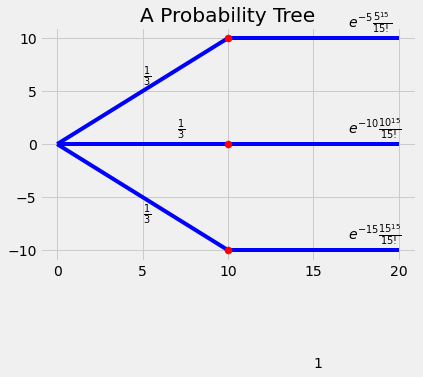

In [102]:
plots.plot([0, 10], [0, 10], color = "blue")
plots.plot([10, 20], [10, 10], color = "blue")
plots.plot([0,10], [0, -10], color = "blue")
plots.plot([10, 20], [-10, -10], color = "blue")
plots.plot([0, 10], [0,0], color = "blue")
#plots.plot([10, 20], [0, -10], color = "blue")
plots.plot([10, 20], [0,  0], color = "blue")
plots.text(5, 6, r'$ \frac{1}{3}$')
plots.text(7, 1, r'$ \frac{1}{3}$')
plots.text(5, -7, r'$ \frac{1}{3}$')
plots.text(17, 11, r'$ e^{-5}\frac{5^{15}}{15!}$')
plots.text(17, 1, r'$ e^{-10}\frac{10^{15}}{15!}$')
plots.text(17, -9, r'$ e^{-15}\frac{15^{15}}{15!}$')
plots.text(15, -21, r'$ 1$')
plots.scatter([10,10,10],[-10, 0,10], zorder=50, s=50, color ="red")
plots.title("A Probability Tree");

    a) What's the probability that the call center receives exactly 15 calls during your first 
    hour?

*Answer* $$\frac{1}{3} \cdot  e^{-5}\frac{5^{15}}{15!} + \frac{1}{3} \cdot  e^{-10}\frac{10^{15}}{15!} +\frac{1}{3} \cdot  e^{-15}\frac{15^{15}}{15!} = \frac{1}{3} \cdot \left( e^{-5}\frac{5^{15}}{15!} + e^{-10}\frac{10^{15}}{15!} + e^{-15}\frac{15^{15}}{15!} \right)$$


In [70]:
## work for a

3**(-1)*(math.e**(-5)*5**15/math.factorial(15) + math.e**(-10)*10**15/math.factorial(15) + math.e**(-15)*15**15/math.factorial(15))

0.045770393909846496

    b) Given that the center does receive 15 calls during the first hour, what is the probability the assignment was to the busiest call center?

This is an application of Bayes' Theorem, along with the Poisson distribution.  

*Answer* $$\frac{\frac{1}{3} \cdot  e^{-15}\frac{15^{15}}{15!}}{\frac{1}{3} \cdot \left( e^{-5}\frac{5^{15}}{15!} + e^{-10}\frac{10^{15}}{15!} + e^{-15}\frac{15^{15}}{15!} \right)} = \frac{  e^{-15}\frac{15^{15}}{15!}}{ e^{-5}\frac{5^{15}}{15!} + e^{-10}\frac{10^{15}}{15!} + e^{-15}\frac{15^{15}}{15!} }$$




In [71]:
## work for b

## fraction complicated enough to warrant splitting into two steps

denominator = 3**(-1)*(math.e**(-5)*5**15/math.factorial(15) + math.e**(-10)*10**15/math.factorial(15) + math.e**(-15)*15**15/math.factorial(15))

numerator = math.e**(-15)*15**15/math.factorial(15)*3**(-1)

numerator/denominator


0.7460125633926974

Let's extend this example and add two more parts!

    c) What's the probability of receiving 15 calls an hour for the first three hours?

The answer to this is:

$$\frac{1}{3} \left[ \left( e^{-5}\frac{5^{15}}{15!}\right)^3 + \left(e^{-10}\frac{10^{15}}{15!}\right)^3 + \left(e^{-15}\frac{15^{15}}{15!} \right)^3 \right]$$


    d) Given that the center received 45 total calls in the first three hours, now what is the probability that the center is the busiest one?

*Answer* $$\frac{\frac{1}{3} \left(e^{-15}\frac{15^{15}}{15!}\right)^3}{\frac{1}{3} \left[ \left( e^{-5}\frac{5^{15}}{15!}\right)^3 + \left(e^{-10}\frac{10^{15}}{15!}\right)^3 + \left(e^{-15}\frac{15^{15}}{15!} \right)^3 \right]} = \frac{ \left(e^{-15}\frac{15^{15}}{15!}\right)^3}{  \left( e^{-5}\frac{5^{15}}{15!}\right)^3 + \left(e^{-10}\frac{10^{15}}{15!}\right)^3 + \left(e^{-15}\frac{15^{15}}{15!} \right)^3 }$$


In [72]:
## for c

3**(-1)*((math.e**(-5)*5**15/math.factorial(15))**3 + (math.e**(-10)*10**15/math.factorial(15))**3 + (math.e**(-15)*15**15/math.factorial(15))**3)

0.00037223924007040297

In [77]:
## for d

h = 3

denominator2 = 3**(-1)*((math.e**(-5)*5**15/math.factorial(15))**h + (math.e**(-10)*10**15/math.factorial(15))**h + (math.e**(-15)*15**15/math.factorial(15))**h)

numerator2 = (math.e**(-15)*15**15/math.factorial(15))**h*3**(-1)

numerator2/denominator2

0.9625265789990869

If you work a full 8 hour shift and get 15 (or more) calls per hour each hour the whole time, the probability that you're at the busy call center is at least:

$$\frac{ \left(e^{-15}\frac{15^{15}}{15!}\right)^8}{  \left( e^{-5}\frac{5^{15}}{15!}\right)^8 + \left(e^{-10}\frac{10^{15}}{15!}\right)^8 + \left(e^{-15}\frac{15^{15}}{15!} \right)^8 } \approx 0.9998$$

So if you were there all day and received at least $8\times 15 = 120$ calls, then you'd be nearly certain that you were at the busy call center.  


Calculations similar to this one are a cornerstone of what is known as Bayesian Analysis, an area of statistics that uses Bayes' Theorem extensively.  In this example, at the beginning of the day, there was only a $\frac{1}{3}$ chance that you were sent to the busy call center.  However, after 8 very busy hours, you are now almost certain that you were sent to the busy call center.  In the context of Bayesian analysis, your "prior" was $\frac{1}{3}\approx 0.3333$ but your "posterior" is $0.9998$.  

Unfortunately (or maybe fortunately) this class is not a class on Bayesian analysis, so this is probably all we'll have to say about that topic.  

**Example** If while working in a call center, you receive 15, 17, 13 and 16 calls during the first four hours, what would you estimate the average number of calls per hour to be?

The logical thing to do would be to take the average of these numbers $\displaystyle \frac{15+17+13+16}{4} = 15.25$.  

Does this also match what the so-called maximum likelyhood estimate would give us?  Let's see:

First, let $f(k) = e^{-\lambda} \frac{\lambda^k}{k!}$ and then 

$Pr(X = \{15, 17, 13, 16\}) = f(15)\cdot f(17) \cdot f(13) \cdot f(16)$

Again, we don't know $\lambda$ so we'll be leaving that in as a variable.  

$$L(\lambda) = f(15)\cdot f(17) \cdot f(13) \cdot f(16) = e^{-\lambda} \frac{\lambda^{15}}{15!} \cdot e^{-\lambda} \frac{\lambda^{17}}{17!} \cdot e^{-\lambda} \frac{\lambda^{13}}{13!} \cdot e^{-\lambda} \frac{\lambda^{16}}{16!}$$


In [117]:
def pmf2(L, k):
    return math.e**(-1*L)*L**k/math.factorial(k)

def likelyhood(L):
    return pmf2(L, 15)*pmf2(L, 17)*pmf2(L, 13)*pmf2(L, 16)

L = np.arange(10, 20.001, 0.001)

y = likelyhood(L)

max_table2 = Table().with_columns("L", L, "y", y)
max_L = max_table2.where("y", max(y)).column("L").item(0)

max_L

15.24999999999709

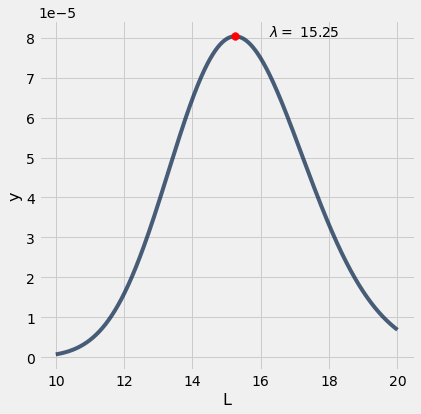

In [128]:
max_table2.plot("L")
plots.scatter(max_L, max(y), color= "red", zorder=5, s = 60)
plots.text(max_L +1, max(y), f"$\lambda = $ {np.round(max_L, 3)}");

So this much more complicated calculation leads to the same answer as the much simpler average.  

## Variance of Poisson distribution

The variance of a Poisson  distribution with mean $\lambda$ is also $\lambda$.  

**Example** A Poisson distribution has mean 25.  If $X$ will be an observation from this distribution, what is the probability that $X$ falls no more than 1 standard deviation away from the mean?

*Solution*  Since $\lambda = \sigma^2 = 25$ we know $\sigma = 5$.  So we're being asked to compute:

$$Pr(20 \leq X \leq 30)$$

Let Python do this for us.



In [129]:
sum(stats.poisson.pmf(np.arange(20, 31), 25))

0.7297340350670105

## Relationship to Binomial

Long ago, people didn't use computer or hand held calculators to do all their calculations, there was a time when these had to be done mostly by hand.  Also, when the numbers involved are quite large, the arithmetic can become extremely difficult or tedious.  

Someone noticed that when $n$ is extremely large and $p$ is small, then the Poisson distribution can be used to approximate the binomial distribution.  

How does this approximation work.  For starters, why do you think I forced you to learn the mean and variance of both the Binomial and Poisson distribution?  Just because I'm a giant nerd and think memorizing stuff like that is fun?  Well, maybe that's true, but that's not *why* I showed you this.  

If the mean and variance of $Bin(n, p)$ is $np$ and $np(1-p)$ and the mean and variance of $Poisson(\lambda)$ are both $\lambda$ then to use the Poisson to approximate the binomial, just use $np$ for your $\lambda$.  

If $n$ is extremely large, and $p$ is very small then $1 - p \approx 1$ so $np \approx np(1-p)$.  

**Example** Only 0.1% of the population has a certain rare condition.  We pick 2000 random people and let $X$ be the number of people in that sample that have this condition.  What is the probability that we find at least 3 people with the condition?

To start, we realize that this is $Bin(2000, 0.001)$, so $\displaystyle f(k) = \left(\begin{array}{c}2000\\k \end{array} \right) 0.001^k\cdot 0.999^{2000-k}$

Also, $Pr(X\geq 3) = 1 - Pr(X < 3) = 1 - \left[f(0) + f(1) + f(2)\right]$



In [132]:
1-sum(stats.binom.pmf(np.arange(3), 2000, 0.001))

0.32332356123765904

But we also know that this is the exact situation where the Poisson approximation applies, 

so $f(k) \approx e^{-np}\frac{(np)^k}{k!}$

In [133]:
1-sum(stats.poisson.pmf(np.arange(3), 2000*0.001))

0.3233235838169365

## Normal Distribution ##

The normal distribution is common probability distribution, often used in statistics.  

What we call the Standard Normal distribution, has a mean of 0 and a standard deviation of 1.  It is denoted $N(0, 1)$.  

When the mean is $\mu$ and the standard deviation is $\sigma$, we use the notation $N(\mu, \sigma)$ to refer to that normal distribution.  


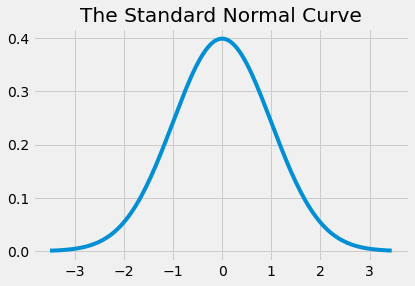

In [51]:
x = np.arange(-3.5, 3.5, 0.05)
y = stats.norm.pdf(x, 0, 1)
plots.plot(x, y)
plots.title("The Standard Normal Curve");

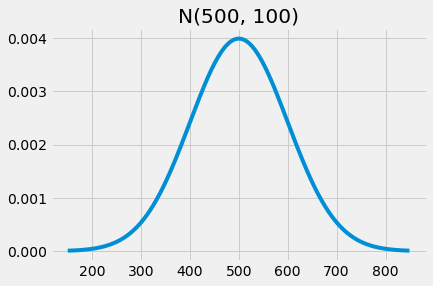

In [52]:
x = np.arange(150, 850, 1)
y = stats.norm.pdf(x, 500, 100)
plots.plot(x, y)
plots.title("N(500, 100)");

Suppose a test has scores that follow $N(500, 100)$.

1. What proportion of students score below 400?

2. What's the probability a randomly selected test will have a score below 400?

3. What's the probability a randomly selected test will have a score between 400 and 700?


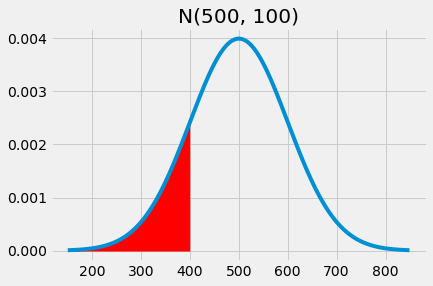

In [53]:
# 1. What proportion of students score below 400?

x = np.arange(150, 850, 1)
y = stats.norm.pdf(x, 500, 100)
plots.plot(x, y)
plots.title("N(500, 100)")
plots.fill_between(x,y, where =x < 400, color="red");
hide_code()

In [54]:
#1. What proportion of students score below 400?
# Use the normal cdf to get the numerical approximation to the shaded area above

stats.norm.cdf(400, 500, 100)

0.15865525393145707

In [55]:
## 2. What's the probability a randomly selected test will have a score below 400?

### SURPRISE!! 

## 2 has the same answer as 1, because it's really the exact same question!


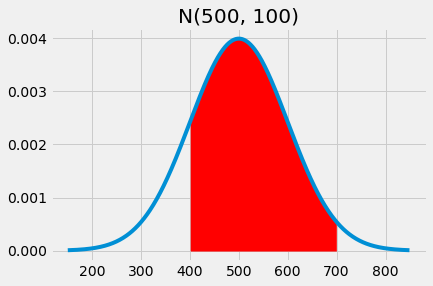

In [56]:
# 3. What's the probability a randomly selected test will have a score between 400 and 700?

x = np.arange(150, 850, 1)
y = stats.norm.pdf(x, 500, 100)
plots.plot(x, y)
plots.title("N(500, 100)")
plots.fill_between(x,y, where =abs(x-550)<150, color="red");
hide_code()

In [57]:
# 3. What's the probability a randomly selected test will have a score between 400 and 700?

## Again, we can use the normal cdf to get the area of the shaded region above.

stats.norm.cdf(700, 500, 100) - stats.norm.cdf(400, 500, 100)

0.8185946141203637

## Standard Units ##

In the context of a normal distribution, the idea of "standard unit" has another name, *z -score*.

$$ z = \frac{x - \mu}{\sigma}$$

When $\mu$ and $\sigma$ are unknown, and we're working with statistics from a sample the standard units are:

$$SU = \frac{x - \overline{x}}{S_x}$$


Converting to z-scores allows us to compare <u>any</u> normal distribution to the Standard Normal.


**Example** Fraternal twins Richard and Rachel are both unusually tall.  Richard is male and is 6'5'', while Rachel is female and 6'1''.  (These are 77 and 73 inches tall, respectively.)  Assume that the distribution of heights for males follows $N(69, 3)$, while the distribution of heights for females follows $N(64, 4)$, both in inches.  Settle a dispute between the two siblings: who is the <u>most</u> unusually tall?

This isn't simply, "who's the tallest?", the answer to that is obvious.  Rather, for the population they are each part of who is further out in the "tail" of the distribution?

*Solution:* Find both of their z-scores and compare those.

For Rachel, $z = \frac{73-64}{4}$

For Richard, $z = \frac{77 - 69}{3}$



In [68]:
(73-64)/4

2.25

In [59]:
(77-69)/3

2.6666666666666665

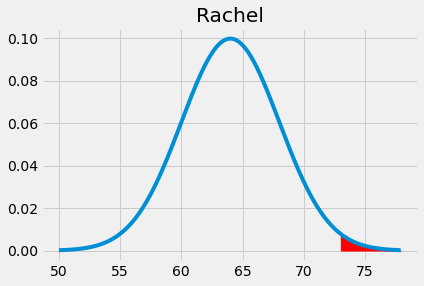

In [60]:
x = np.arange(50, 78, .1)
y = stats.norm.pdf(x, 64, 4)
plots.plot(x, y)
plots.title("Rachel")
plots.fill_between(x,y, where =x>73, color="red");
hide_code()

In [61]:
(77-69)/3

2.6666666666666665

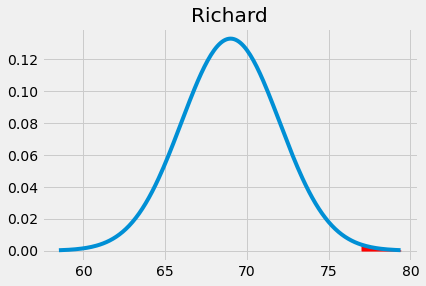

In [62]:
x = np.arange(58.5, 79.5, .1)
y = stats.norm.pdf(x, 69, 3)
plots.plot(x, y)
plots.title("Richard")
plots.fill_between(x,y, where =x>77, color="red");

hide_code()

## Empirical Rule ##

Recall that when we first learned about the standard deviation, we discussed how it was a measure of spread around the mean.  

We learned a little rule called Chebyshev's Inequality, but at the same time, we discussed how if the data was "normal", there was a rule that was even better than Chebyshev's.  

Like, Chebyshev's Inequality, the Empirical Rule gives us a way of *understanding* exactly *how* the standard deviation tells us how far the data spreads out around the mean.  Here's the rule in written form, but the graphs below probably show it in a way that makes more sense.

- 68% of <u>any</u> normal population will fall within 1 standard deviation of the mean
- 95% of <u>any</u> normal population will fall within 2 standard deviations of the mean.
- 99.7% of <u>any</u> normal population will fall within 3 standard deviations of the mean.  

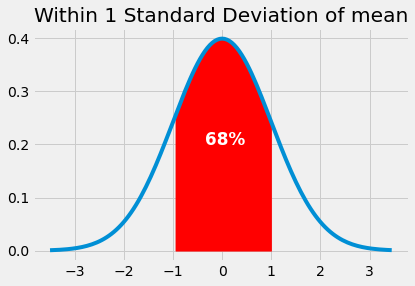

In [69]:
x = np.arange(-3.5, 3.5, 0.05)
y = stats.norm.pdf(x, 0, 1)
plots.plot(x, y)
plots.fill_between(x,y, where =abs(x)<=1, color="red")
plots.text(-0.35, .2, "68%", color="white", weight="bold", size='large')
plots.title("Within 1 Standard Deviation of mean");
hide_code()

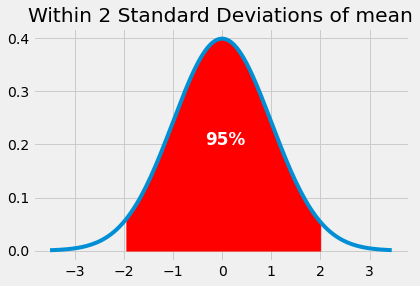

In [64]:
x = np.arange(-3.5, 3.5, 0.05)
y = stats.norm.pdf(x, 0, 1)
plots.plot(x, y)
plots.fill_between(x,y, where =abs(x)<=2, color="red")
plots.text(-0.35, .2, "95%", color="white", weight="bold", size="large")
plots.title("Within 2 Standard Deviations of mean");
hide_code()

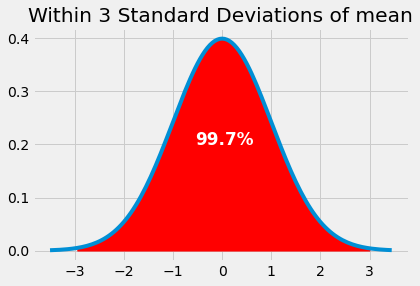

In [65]:
x = np.arange(-3.5, 3.5, 0.05)
y = stats.norm.pdf(x, 0, 1)
plots.plot(x, y)
plots.fill_between(x,y, where =abs(x)<3, color="red")
plots.text(-0.55, .2, "99.7%", color="white", weight="bold", size="large")
plots.title("Within 3 Standard Deviations of mean");
hide_code()

So if you know that your data is normal, or just approximately normal, and you know the mean and standard deviation, you can quickly compute the upper and lower bounds that should capture all or nearly all of the data.

**Example:** If you're told that a sample of data is (approximately) normal with a mean of 50 and a standard deviation of 6, then you know that most (if not <u>all</u>) of that data is between $50 - 3\cdot 6 = 32$ and $50 + 3\cdot 6 = 68$. 

**Example:** Similarly, if $X$ is an observation from $N(50, 6)$, then the probability that $X$ is between 32 and 68 is 0.997, or 99.7%.  

It works this way with any normal population or distribution.


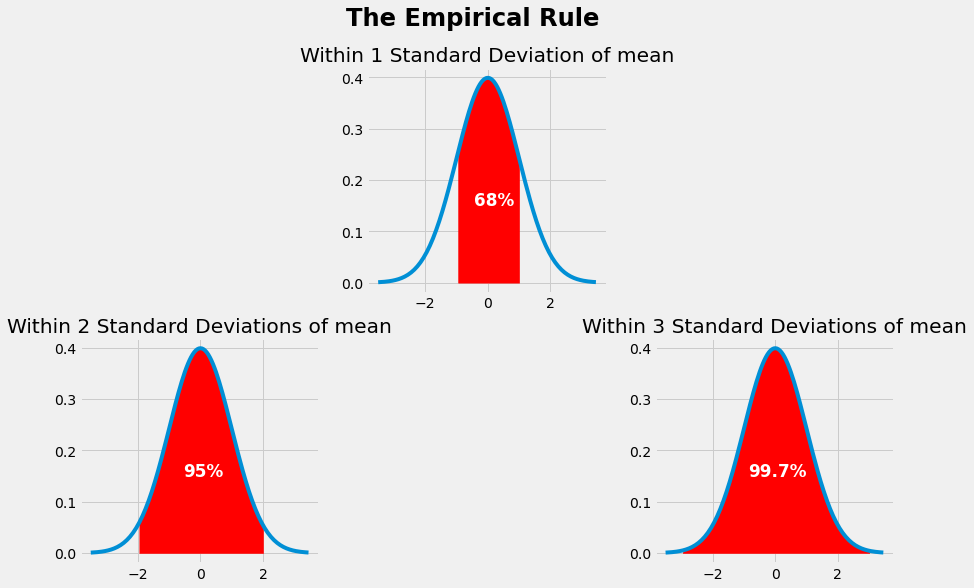

In [66]:
from hidden_demos import empirical_rule_demo
empirical_rule_demo()

## Use of Probability in Statistics ##

A major field within statistics is hypothesis testing.  In the context of hypothesis testing we use probabilities to determine the outcome of the test.  

A test has a pre-set value called **The Level of Significance**, denoted $\alpha$.  The final output of most hypothesis tests is a p-value or $p$.  When $p < \alpha$ we say the result is significant.  

Usually, though not always, $\alpha = 0.05$.  This is sometimes attributed to R.A. Fisher, who once said that he'd consider an event to unlikely if it has probability of less than one-in-twenty.

$H_o: p = \frac{1}{2}$
    
$H_A: p > \frac{1}{2}$


Another Example:  

I brag too much about my basketball skills.  I claim I hit 80% of my free throws.  We go to the gym and I shoot 20 free throws, making only 8 of them.  

Do you believe my overall, life-time, free throw percentage is really 80%?

???

In [77]:
sum(stats.binom.pmf(np.arange(14), 20, .8))

0.08669251356740028

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:3006: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


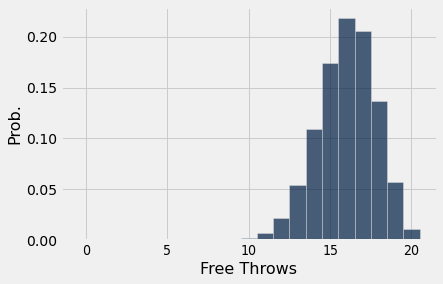

In [72]:
fives = np.arange(21)

pmf = stats.binom.pmf(fives, 20, .8)

Table().with_columns("Free Throws", fives, "Prob.", pmf).bar("Free Throws")